# VESTIAIRE COLLECTIVE ANALYSIS: Part 1  *Cleaning and Plotting*

### Importing Libraries and Data

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Importing DATA and path
path = r'C:\Users\Nuria Miquel\Desktop\nuria\Data Analysis\Vestiaire Collective'
df = pd.read_csv(os.path.join(path, 'Data', 'vestiaire.csv'), index_col = False)

### Cleaning

In [79]:
df.shape

(900514, 36)

In [81]:
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.00,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.00,14.00,0.00,13.00,0.00
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.00,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.00,0.00,0.00,8.00,0.00
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.00,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.00,69.00,0.00,62.00,96.00
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.00,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.00,274.00,"126,346.00",131.00,96.00
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.00,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.00,14.00,"102,821.00",40.00,89.00


In [83]:
df.dtypes

product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count            float64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees          object
buyers_fees                   float64
warehouse_na

In [85]:
df_dups = df[df.duplicated()]

In [86]:
df_dups

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate


In [87]:
df.isnull().sum()

product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

Most of the missing values belong in the 'usually_ships_within' column. Values missing on columns 'product_keywords' and 'product_category' belong to the same rows. Same thing happens for missing values in 'has_cross_border_fees' and 'buyers_fees'. All of these columns that have dtype 'object' will have the Nan values replaced with the column's mode, and if they have a numeric value, with the median. The rest of the missing values will be dropped given that it is such a small number.

In [89]:
mode_usw = df['usually_ships_within'].mode()[0]
mode_product_keywords = df['product_keywords'].mode()[0]
mode_product_category = df['product_category'].mode()[0]
mode_hcbf = df['has_cross_border_fees'].mode()[0]
med_buyers_fees = df['buyers_fees'].median()

In [90]:
print(mode_usw)
print(mode_product_keywords)
print(mode_product_category)
print(mode_hcbf)
print(med_buyers_fees)

1-2 days
Gucci Plastic Sunglasses
Men Clothing
True
23.97


In [91]:
df['usually_ships_within'].fillna('1-2 days', inplace = True)
df['product_keywords'].fillna('Gucci Plastic Sunglasses', inplace = True)
df['product_category'].fillna('Men Clothing', inplace = True)
df['has_cross_border_fees'].fillna('True', inplace = True)
df['buyers_fees'].fillna(23.97, inplace = True)

C:\Users\Nuria Miquel\AppData\Local\Temp\ipykernel_2280\741671265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['usually_ships_within'].fillna('1-2 days', inplace = True)
C:\Users\Nuria Miquel\AppData\Local\Temp\ipykernel_2280\741671265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [98]:
df.dropna(inplace = True)

In [99]:
df.isnull().sum()

product_id                    0
product_type                  0
product_name                  0
product_description           0
product_keywords              0
product_gender_target         0
product_category              0
product_season                0
product_condition             0
product_like_count            0
sold                          0
reserved                      0
available                     0
in_stock                      0
should_be_gone                0
brand_id                      0
brand_name                    0
brand_url                     0
product_material              0
product_color                 0
price_usd                     0
seller_price                  0
seller_earning                0
seller_badge                  0
has_cross_border_fees         0
buyers_fees                   0
warehouse_name                0
seller_id                     0
seller_username               0
usually_ships_within          0
seller_country                0
seller_p

In [101]:
df.shape

(900461, 36)

In [104]:
# I'm changing data types to make the file lighter
df['product_like_count'] = df['product_like_count'].astype('int32')
df['seller_products_sold'] = df['seller_products_sold'].astype('int32')
df['seller_num_products_listed'] = df['seller_num_products_listed'].astype('int32')
df['seller_community_rank'] = df['seller_community_rank'].astype('int32')
df['seller_num_followers'] = df['seller_num_followers'].astype('int32')

In [106]:
# To prevent scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

## **Plots**

### Correlation matrix heatmap

In [110]:
df.dtypes

product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count              int32
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees          object
buyers_fees                   float64
warehouse_na

In [112]:
# I'm going to exclude columns that are not suitable for this heatmap
sub = df[['product_like_count', 'sold', 'available', 'in_stock', 'should_be_gone', 'price_usd', 'seller_price', 'seller_earning', 
       'buyers_fees', 'seller_products_sold', 'seller_num_products_listed', 'seller_community_rank', 'seller_num_followers', 'seller_pass_rate']]

In [114]:
sub

,product_like_count,sold,available,in_stock,should_be_gone,price_usd,seller_price,seller_earning,buyers_fees,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,34,True,True,False,False,272.92,223.65,216.94,23.97,3,14,0,13,0.00
1,1,False,True,False,False,127.80,106.50,106.50,21.30,0,0,0,8,0.00
2,2,False,True,False,False,"1,278.00","1,065.00",926.55,213.00,58,69,0,62,96.00
3,0,False,True,False,False,163.90,149.00,126.65,14.90,63,274,126346,131,96.00
4,1,False,True,False,False,119.72,99.77,83.55,19.95,19,14,102821,40,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900509,1,False,True,False,False,89.46,74.55,60.71,14.91,40,17,391778,104,100.00
900510,1,False,True,False,False,153.36,127.80,108.63,25.56,26,99,51408,75,89.00
900511,0,False,True,False,False,191.70,159.75,138.98,31.95,0,2,0,3,0.00
900512,27,False,True,False,False,57.51,47.93,34.08,9.59,2,7,0,11,100.00


In [116]:
# I found that I needed to upgrade seaborn and downgrade matplotlib for the matrix heatmap to work
pip install seaborn --upgrade
pip install matplotlib==3.7.3 --user

SyntaxError: invalid syntax (55778030.py, line 2)

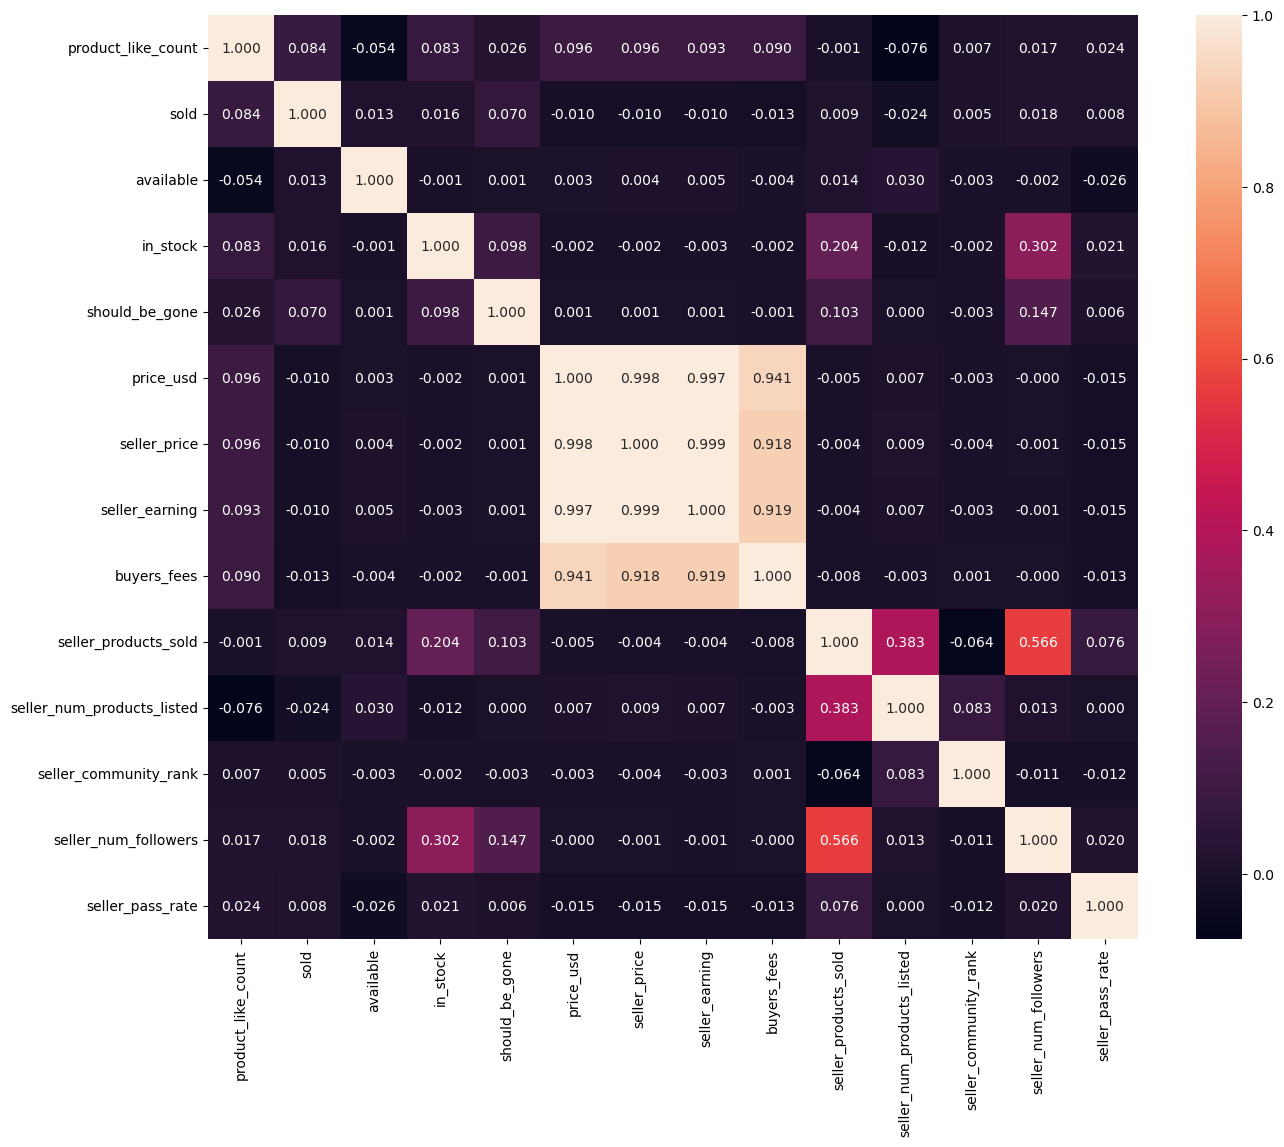

In [118]:
# Creating the Matrix Correlation Heatmap
f,ax = plt.subplots(figsize=(15,12))
matrix = sns.heatmap(sub.corr(), annot = True, fmt= '.3f', ax = ax)

This heatmap shows little correlation between most of the variables. It is true that many columns had to be excluded because they were filled with objects, so a lot of information was lost, but it does give insights on how numeral variables affect each other. **It is mainly the columns related to the prices that have a strong positive relationship between them**, probably because fees cost depend on the price of the item. There is also a **modereate relationship between seller_products_sold_ and both seller_num_followers and seller_num_products_listed**, it makes sense that sellers that make more sales are those with a wider audience or more products listed.

### Scatterplot

#### Exploring relationship between Seller's products sold and number of followers
To be able to explore the relationships between the variables that have to do with the sellers, I need to create a new dataframe that contains the aggregated values for each seller.

In [123]:
df_seller = df.groupby('seller_id').agg({'seller_username' : 'first',
                                         'seller_country' : 'first',
                                         'usually_ships_within' : 'first',
                                         'seller_products_sold' : 'first', 
                                         'seller_num_products_listed' : 'first', 
                                         'seller_community_rank': 'first', 
                                         'seller_num_followers': 'first', 
                                         'seller_pass_rate': 'first'}).reset_index()

In [125]:
df_seller.head()

,seller_id,seller_username,seller_country,usually_ships_within,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,1,sophiehersan,France,1-2 days,63,2,0,3972,98.00
1,4,stephanie200906010000,France,1-2 days,51,3,157169,321,76.00
2,6,sebastien1,France,6-7 days,250,5,21952,993,96.00
3,12,Henrique,France,1-2 days,256,13,10764,768,93.00
4,33,sue98,France,1-2 days,411,8,11051,585583,96.00


In [127]:
df_seller.to_csv(os.path.join(path, 'Data', 'Prepared', 'sellers.csv'), index = False)

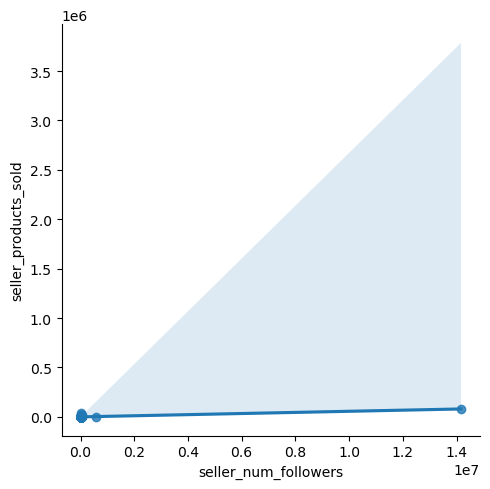

In [129]:
sns.lmplot(x = 'seller_num_followers', y = 'seller_products_sold', data = df_seller)

I found that outliers were messing with the readability of the plot so I'm going to exclude the 5 highest values from both columns:

In [131]:
df_seller.nlargest(5, 'seller_num_followers')

,seller_id,seller_username,seller_country,usually_ships_within,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
754,48600,vestiaireco,France,1-2 days,79710,3067,0,14166233,98.90
4,33,sue98,France,1-2 days,411,8,11051,585583,96.00
13108,1760381,rebag,United States,3-5 days,11779,16054,3,43222,82.00
6582,835321,fabienne835321,France,1-2 days,311,319,373,43201,0.00
81390,12698884,MytheresaXVestiaireCollective,France,1-2 days,22532,1118,4,38926,99.00


In [132]:
df_seller.nlargest(5, 'seller_products_sold')

,seller_id,seller_username,seller_country,usually_ships_within,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
754,48600,vestiaireco,France,1-2 days,79710,3067,0,14166233,98.90
56105,9071862,viteenvogue,Germany,3-5 days,38543,24889,2,29506,85.00
39940,6508493,haute6508493,United Kingdom,1-2 days,23235,190,1,20272,83.00
81390,12698884,MytheresaXVestiaireCollective,France,1-2 days,22532,1118,4,38926,99.00
64011,10056903,brandearbags10056903,Japan,1-2 days,15540,22530,10,19964,91.00


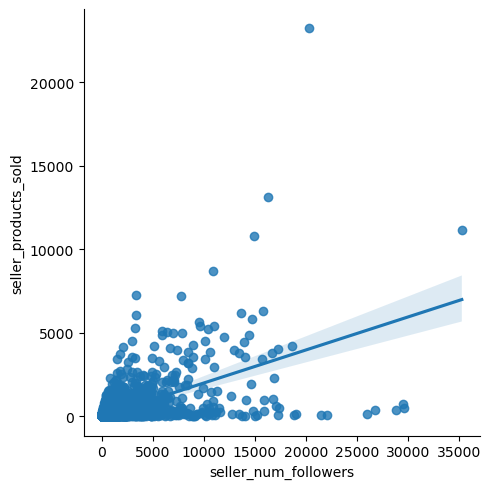

In [133]:
seller_plot = sns.lmplot(x = 'seller_num_followers', y = 'seller_products_sold', data = df_seller[~df_seller['seller_id'].isin([48600, 33, 1760381, 835321, 12698884,
                                                                                                                  9071862, 10056903, 48600, 9360167, 6633364])])

The plot suggests a weak relationship between the two variables. 

In [153]:
seller_plot.savefig(os.path.join(path, 'Visualizations', 'seller_scatterplot.png'))

#### Exploring realationship relating to price

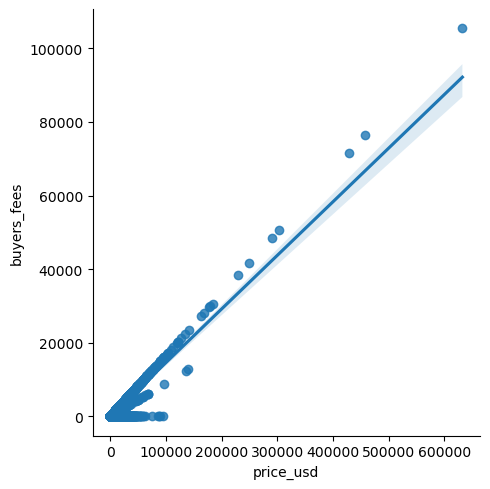

In [156]:
price_fee_plot = sns.lmplot( x = 'price_usd', y = 'buyers_fees', data = sub)

The plot suggests a very strong correlation between these two variables. It looks like there are two clear lines that draw on the plot in other directions. This suggests that there might be different pre-set fees depending on the price range of the product.

In [174]:
price_fee_plot.savefig(os.path.join(path, 'Visualizations', 'price and fee corr.png'))

### Categorical Plot

#### Exploring relationship between number of likes and an item being sold

In [178]:
def results1(row): 
    if row ['product_like_count'] <= 10:
        return '0-10'
    elif (row['product_like_count'] > 10) and (row['product_like_count'] <= 20):
        return '11-20'
    elif (row['product_like_count'] > 20) and (row['product_like_count'] <= 30):
            return '21-30'
    elif (row['product_like_count'] > 30) and (row['product_like_count'] <= 40):
        return '31-40'
    elif (row['product_like_count'] > 40) and (row['product_like_count'] <= 50):
        return '41-50'
    elif (row['product_like_count'] > 50) and (row['product_like_count'] <= 60):
        return '51-60'
    elif (row['product_like_count'] > 60) and (row['product_like_count'] <= 70):
        return '61-70'
    elif (row['product_like_count'] > 70) and (row['product_like_count'] <= 80):
        return '71-80'
    elif (row['product_like_count'] > 80) and (row['product_like_count'] <= 90):
        return '81-90'
    elif (row['product_like_count'] > 90) and (row['product_like_count'] <= 100):
        return '91-100'
    if row ['product_like_count'] > 100:
            return '>100'

In [179]:
df['like_count_range'] = df.apply(results1, axis =1)

In [180]:
crosstab_1 = pd.crosstab(df['like_count_range'], df['sold'], dropna = False)

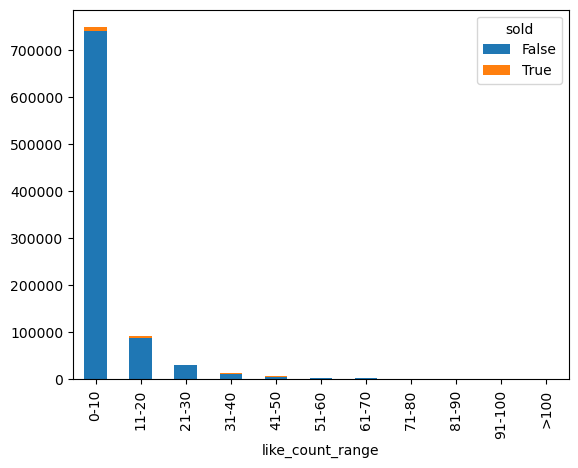

In [181]:
likes_and_sold = crosstab_1.plot(kind = 'bar', stacked = True)
   

In [182]:
sold_items = df[df['sold'] == True]

In [183]:
sold_items.to_csv(os.path.join(path, 'Data', 'Prepared', 'sold_items.csv'))

Text(0.5, 1.0, ' Sold products by Number of Likes')

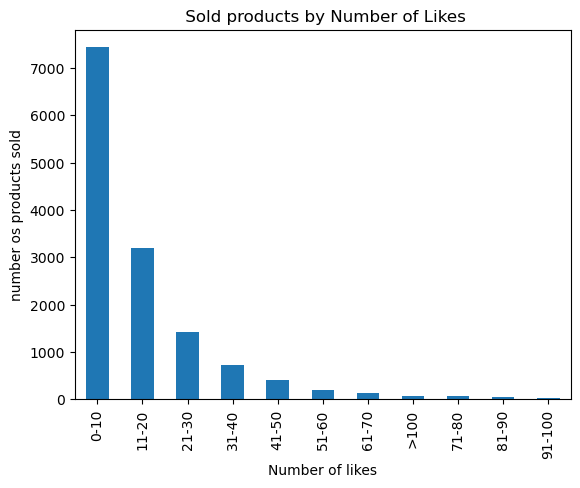

In [184]:
sold_items['like_count_range'].value_counts().plot.bar()
plt.xlabel('Number of likes')
plt.ylabel('number os products sold')
plt.title(' Sold products by Number of Likes')

These two plots show that the number of likes does not affect the item being sold. In the first one we can see that there are many more items available than products that have been sold, and when on the second plot we take a look at only the sold items, we can see that those with a lower number of likes are the ones that make up the most sales.

#### Listings by Brand

In [187]:
top_10_brands_listings = df['brand_name'].value_counts().head(10)

Text(0.5, 1.0, 'Listings per Brand')

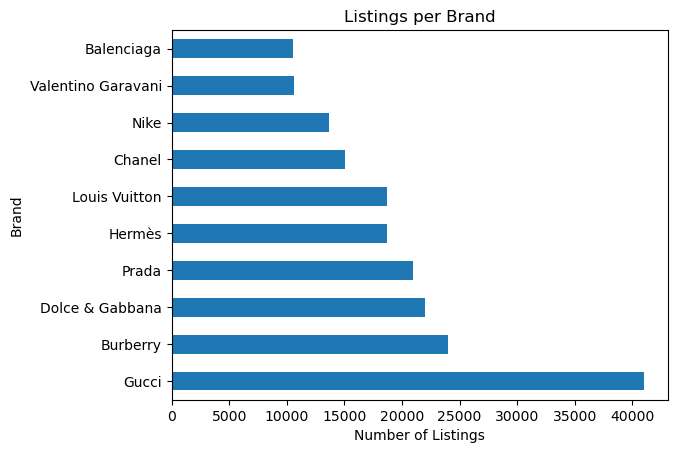

In [188]:
top_10_brands_listings.plot.barh()
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.title('Listings per Brand')

In this plot we can observe that Gucci is by far the most listed brand in Vestiaire. Burberry, Dolce & Gabbana, Prada and Hermès follow. Based on this we can see that, with the exception of Nike, the brands that are most popular are all luxury high-end brands.

#### Money Generated by Brand

In [191]:
money_brands_generated = sold_items.groupby('brand_name')['price_usd'].sum()

In [192]:
money_brands_generated = money_brands_generated.sort_values(ascending = False)

In [193]:
top_10_money = money_brands_generated.head(10)

Text(0.5, 1.0, 'Money generated by Brand')

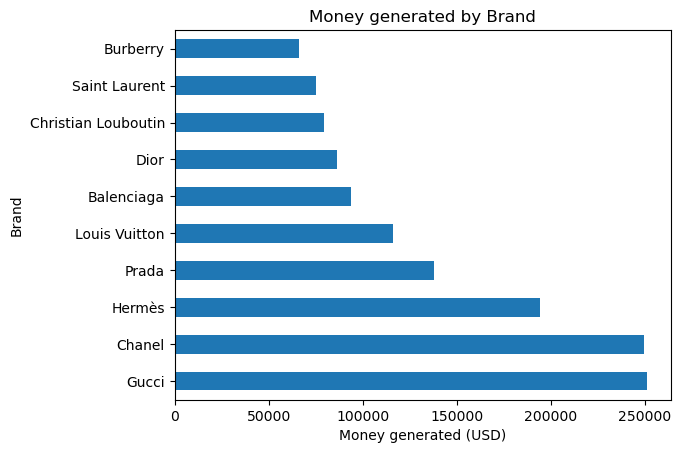

In [194]:
top_10_money.plot.barh()
plt.xlabel('Money generated (USD)')
plt.ylabel('Brand')
plt.title('Money generated by Brand')

Gucci remains in the list as the top brand, this time followed by Chanel, which was further down the line in the Listings plot, and then by Hermès, Prada, and Louis Vuitton. This could be due to their items being pricier or more popular among buyers. Further in this analysis we will explore these possibilities.

#### Top Product Type Listings

In [197]:
top_prod_type = df['product_type'].value_counts().head(10)

Text(0.5, 1.0, 'Number of Products Listed by type')

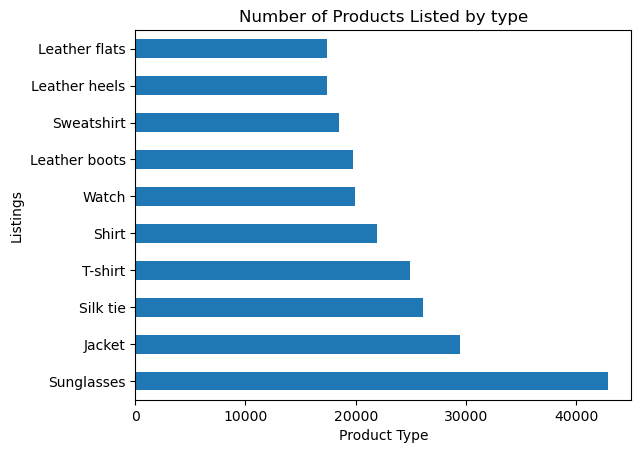

In [198]:
top_prod_type.plot.barh()
plt.xlabel('Product Type')
plt.ylabel('Listings')
plt.title('Number of Products Listed by type')

Throught this plot we can observe that the most listed product are Sunglasses, with a big difference from the following Jacket, Silk Tie, T-shirt and Shirt.

#### Top product type Sales

In [201]:
top_prod_type_sold = sold_items['product_type'].value_counts().head(10)

Text(0.5, 1.0, 'Number of Products SOLD by type')

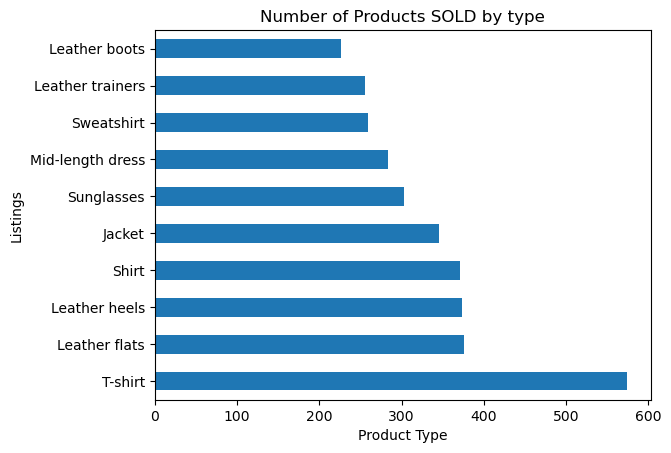

In [202]:
top_prod_type_sold.plot.barh()
plt.xlabel('Product Type')
plt.ylabel('Listings')
plt.title('Number of Products SOLD by type')

In contras with the listings per type, this plot shows that T-shirts are the most sold items. This change might be due to sizing, T-shirts are classified by their size so it is easier for the customer to know if the item will fit them, while sunglasses are harder to guess if not tryied on. Same thing happens to the following categories, leather flats, leather heels, shirts and jackets.

#### Seller Badge and money generated

In [205]:
seller_badge_money = sold_items.groupby('seller_badge')['price_usd'].sum()

AttributeError: This method only works with the ScalarFormatter

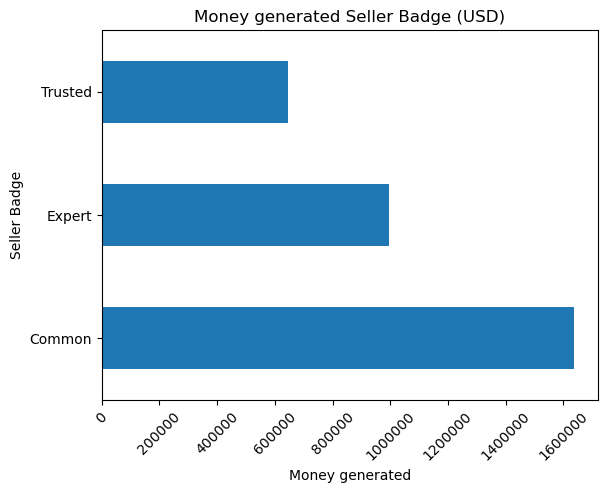

In [206]:
seller_badge_money.plot.barh()
plt.xlabel('Money generated')
plt.ylabel('Seller Badge')
plt.title('Money generated Seller Badge (USD)')
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'plain')
plt.bar_label()

In [209]:
df['seller_badge'].value_counts()

seller_badge
Common     511069
Expert     222987
Trusted    166405
Name: count, dtype: int64

It is important to understand what this badges mean: https://es.vestiairecollective.com/seller-badges/
Common sellers are the ones that have generated more money, probably due to the fact that more than half of the sellers fall into this category. Expert Sellers follow being the most trustworthy category and probably have more appealing items since you need to accumulate a higher number of sales to get this badge. Finally there are Trusted sellers.

#### Listings per price range

In [212]:
def results2(row): 
    if row ['price_usd'] <= 100:
        return 'Low Price'
    elif (row['price_usd'] > 100) and (row['price_usd'] <= 250):
        return 'Low-Mid Price'
    elif (row['price_usd'] > 250) and (row['price_usd'] <= 500):
            return 'Mid Price'
    elif (row['price_usd'] > 500) and (row['price_usd'] <= 1000):
        return 'Mid- High Price'
    elif (row['price_usd'] > 1000) and (row['price_usd'] <= 2500):
        return 'High Price'
    if row ['price_usd'] > 2500:
            return 'Highest Price'

In [213]:
df['price_range'] = df.apply(results2, axis =1)

<Axes: ylabel='price_range'>

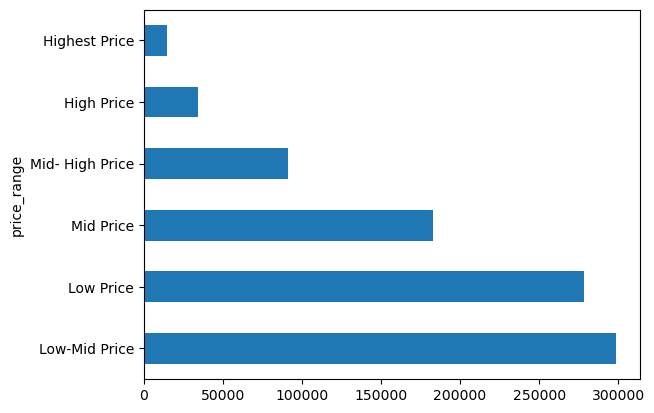

In [214]:
df['price_range'].value_counts().plot.barh()

This plot shows that most of the listings fall in lower and mid price categories. It makes sense since on of the attributes that make items pricier is their exclusivity, therefore it is naturall that there will be less listings for this special pieces.

In [216]:
sold_price_range = df[df['sold'] == True]

#### Sold products per Price Range

<Axes: ylabel='price_range'>

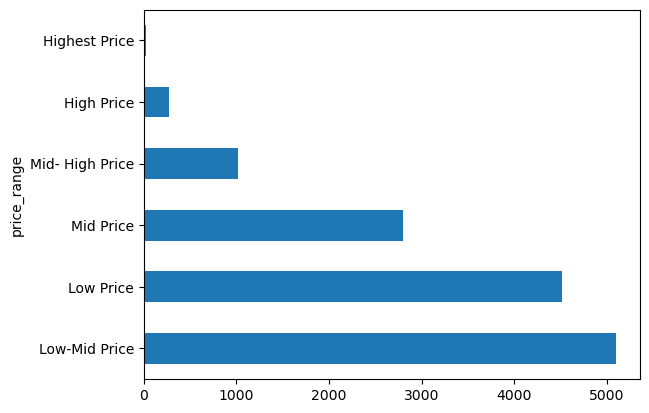

In [218]:
sold_price_range['price_range'].value_counts().plot.barh()

Similar to the chart on listings per price range, Lower prices make up most sales. Again it makes sense because after all mid-high prices start at 500$ a fair amount of money for most people.

#### Listings per country

In [221]:
listings_per_country = df['seller_country'].value_counts().head(10)

Text(0.5, 1.0, 'Top Countries')

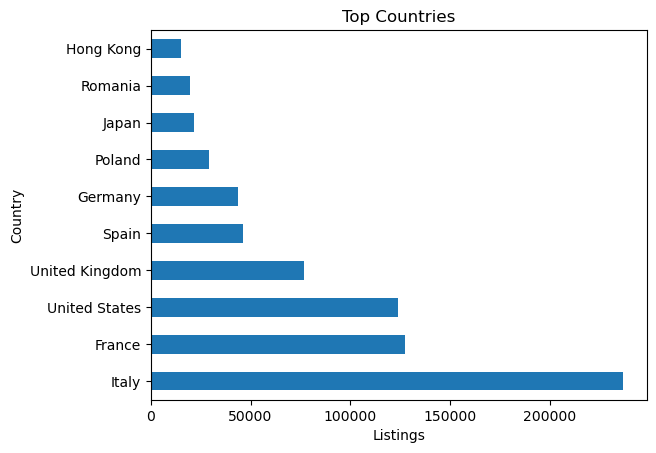

In [222]:
listings_per_country.plot.barh()
plt.xlabel('Listings')
plt.ylabel('Country')
plt.title('Top Countries')

Most sellers are based in Italy, followed by France and the US, with a similar number of sellers in both. Next up is the UK and Spain. With this chart we can see that most sellers are based in Europe, and the top 4 countries are precisally those with what are considered global fashion capitals, Milan, Paris, London and New York.

#### Sales by gender

(array([0, 1]), [Text(0, 0, 'Women'), Text(1, 0, 'Men')])

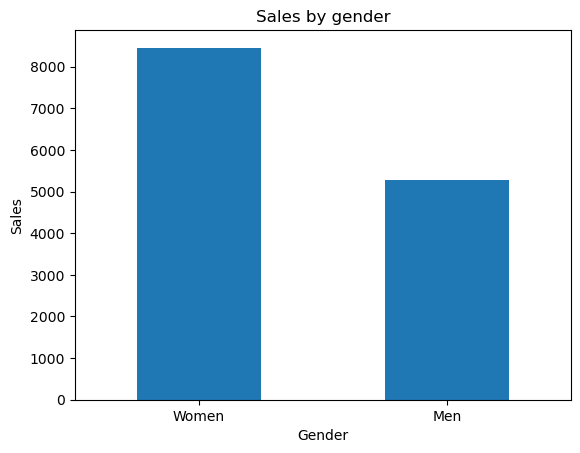

In [225]:
sold_items['product_gender_target'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.title('Sales by gender')
plt.xticks(rotation = 0)

The plot shows that the majority of products sold are marketed towards women.

#### Sales by product Condition

Text(0.5, 1.0, 'Sales by Condition')

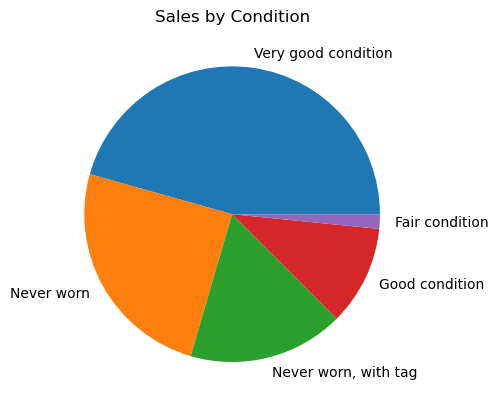

In [228]:
sold_items['product_condition'].value_counts().plot.pie()
plt.style.use('seaborn-v0_8-pastel')
plt.ylabel(None)
plt.title('Sales by Condition')

In this pie chart we can see that most buyers prefer items that are in a very good condition. Those that fall in the lowest category, 'Fair contidion' build the smallest chunk of sales.

Most of the questions were answere with these plots with the exeption of 'Do the fees affect to an item being sold?' Which can't really be answered with the data available.

### Hypotheses

- A higher price means a higher number of likes.
- Brands that make more money are those with more listings on the popular product types.
- Sellers with the highest earnings are those with the highest number of low to mid products in contrast to those with fewer but pricier items.

In [235]:
df.to_csv(os.path.join(path, 'Data', 'Prepared', 'vestiaire_prep.csv'), index = False)